<hr style="border:2px solid black">
<b> Python Web Scraping & Natural Language Processing Modeling</b>

<b> Individual Project </b>

<b> Min Shi </b>
    
<hr style="border:2px solid black">

# Preparation

## Import packages

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
import os 
from os import getcwd
import sys
import csv
import gensim
import pickle
import string
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression,LogisticRegression, SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from scipy.sparse import csr_matrix, hstack
from sklearn.metrics import roc_auc_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/min/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/min/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Specify the directory to use

In [3]:
os.chdir(r'/Users/min/Desktop/2022 Fall Semester/BUAN 6342 NLP/Project/Proposals&Reports/Data_Analysis_in_Python')

# Wall Street Journal (WSJ) News

In [4]:
df1 = pd.read_csv('WSJ_US_Trade.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7645 entries, 0 to 7644
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NewsTitle  5869 non-null   object
 1   Date       7645 non-null   object
 2   NewsText   7645 non-null   object
dtypes: object(3)
memory usage: 179.3+ KB


In [5]:
df1.head()

,NewsTitle,Date,NewsText
0,Free Trade Has Been a Boon for Energy Independ...,2018-01-01,As turbulent as Donald Trump's political care...
1,France Looks to Deepen Trade Ties With Russia ...,2018-01-01,France is losing its appetite for trans-Atlant...
2,A Cold War in the Arctic Circle; NATO plans a ...,2018-01-01,The Arctic is a region of tremendous strategic...
3,World News: France Pursues Wider Trade Relatio...,2018-01-02,France is losing its appetite for trans-Atlant...
4,Free Trade Has Been a Boon for Energy Independ...,2018-01-02,As turbulent as Donald Trump's political caree...


In [6]:
df1['Date'] = df1['Date'].astype('datetime64')

In [7]:
def preprocess_text(text):
    
    stemmer = PorterStemmer()
    
    # Replace Numbers
    text = re.sub(r'\d+', '', text)
    
    # Lower Case
    text = text.split(" ") 
    text = [x.lower() for x in text]  #making all text data lowercase
    
    # Stop Words
    stopwords_english = stopwords.words('english')
    text_processed = []
    
    # Extra words
    extra_words =['say','said','use','review','th','wall','street']

    for word in text:
         # remove stopwords and punctuation
        if (word not in stopwords_english and word not in string.punctuation and word not in extra_words): 
            # Stemming
            stem_word = stemmer.stem(word)
            text_processed.append(stem_word)
            
    # Lemmatizing 
    lemmatizer = WordNetLemmatizer()
  
    text = [lemmatizer.lemmatize(x) for x in text_processed]
           
    return ' '.join(text)

In [8]:
df1['NewsText'] = df1['NewsText'].apply(lambda x: preprocess_text(x))
df1['NewsText']

0       turbul donald trump' polit career thu far, alw...
1       franc lose appetit trans-atlant trade.\neconom...
2       arctic region tremend strateg import global tr...
3       franc lose appetit trans-atlant trade.\neconom...
4       turbul donald trump' polit career thu far, alw...
                              ...                        
7640    earli day parenthood, infant daughter colicki ...
7641    rishi sunak prime minister. india britain. str...
7642    chubb ltd. cb -.%\ndecrease; red point triangl...
7643    seoul—sk hynix inc., one world’ biggest chip m...
7644    emperor penguin soon consid threaten speci end...
Name: NewsText, Length: 7645, dtype: object

## Word Clouds

In [9]:
df1_1 = df1['NewsTitle'].dropna()
df1_1 = df1_1.astype('string')
df1_1 = df1_1.apply(lambda x: preprocess_text(x))
df1_1

0       free trade boon energi independence; nafta del...
1       franc look deepen trade tie russia china; brex...
2       cold war arctic circle; nato plan new command ...
3       world news: franc pursu wider trade relationsh...
4                         free trade boon energi independ
                              ...                        
7634    hous democrat urg biden speak directli russia ...
7637    intel ceo call new u.s. restrict chip export c...
7642                  hurrican ian claim hit profit chubb
7643                chip maker sk hynix slash capit spend
7644             emperor penguin list threaten speci u.s.
Name: NewsTitle, Length: 5869, dtype: object

In [10]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
title_long_string = ','.join(list(df1_1.values))
text_long_string = ','.join(list(df1['NewsText'].values))

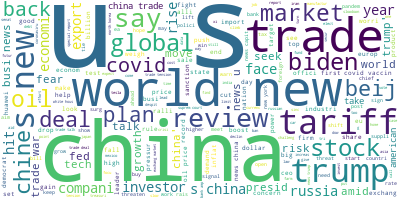

In [11]:
# News Title Word Cloud
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(title_long_string)
# Visualize the word cloud
wordcloud.to_image()

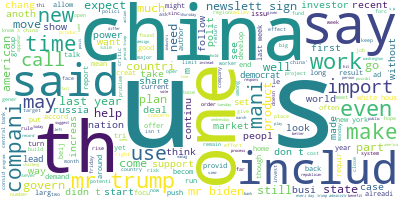

In [12]:
# News Text Word Cloud
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(text_long_string)
# Visualize the word cloud
wordcloud.to_image()

**Based on the word clouds, we could tell that U.S. and China are the most frequent words appeared in the news articles related to U.S. trade, which means U.S.-China trade is one important part and a focus of U.S. trade. Besides, world, new, trade, stock, tariff, trump, and global are also frequent words appeared in the news article titles while company, say, said, trump, work and include are the relatively frequent words appeared in the news article text.**

## Topic Modeling
Topic modeling is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.

### For News Title

In [13]:
# the vectorizer object will be used to transform text to vector form
vect = CountVectorizer(min_df = 20, max_df = 0.2, stop_words = 'english', token_pattern = '(?u)\\b\\w\\w\\w+\\b')

# apply transformation
tf = vect.fit_transform(df1_1)

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vect.get_feature_names()

In [14]:
number_of_topics = 10

Ldamodel = LatentDirichletAllocation(n_components=number_of_topics, random_state=34)

Ldamodel.fit(tf)

LatentDirichletAllocation(random_state=34)

In [15]:
def display_topics(Ldamodel, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(Ldamodel.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

#### LDA Topics
Using ldamodel, find a list of the 10 topics and the most significant 10 words in each topic. This should be structured as a list of 10 tuples.

In [16]:
no_top_words = 10
df_topics = display_topics(Ldamodel, tf_feature_names, no_top_words)
df_topics

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,market,214.2,news,730.0,hous,79.1,trade,320.3,covid,268.7,new,311.4,price,207.0,review,204.1,trump,465.4,china,251.8
1,exchang,168.1,world,491.8,ahead,73.0,china,199.1,say,115.8,bank,79.4,oil,176.9,biden,157.0,tariff,381.5,chine,113.2
2,stock,92.5,china,194.2,economi,65.4,hit,142.0,vaccin,104.1,york,54.1,stock,169.7,russia,78.9,trade,283.7,news,100.3
3,amp,80.5,trade,123.3,white,50.1,talk,112.8,state,57.5,product,48.9,rise,130.8,court,74.1,china,205.6,busi,95.7
4,fall,77.9,growth,97.5,cut,48.7,deal,94.0,test,48.7,china,47.3,investor,118.1,rule,73.0,war,108.2,firm,92.7
5,china,68.9,busi,94.4,tax,48.1,report,79.3,elect,47.9,billion,41.9,fed,83.4,ukrain,67.3,steel,78.1,maker,74.9
6,week,57.8,beij,70.2,crisi,47.1,record,74.1,case,47.6,tesla,39.9,year,69.3,plan,59.1,presid,75.5,north,68.1
7,day,56.1,capit,70.1,set,43.0,tension,51.5,ceo,46.8,dollar,38.1,worri,66.3,pandem,53.0,import,57.9,korea,66.1
8,data,46.3,economi,62.7,oil,40.8,econom,48.0,biden,43.7,shift,37.8,global,64.1,foreign,47.4,tariffs,55.4,sanction,63.4
9,markets,43.1,global,56.8,say,38.7,year,46.8,trump,37.6,job,36.3,fear,61.7,work,46.1,good,49.5,sale,61.8


#### Topic Names
From the list of the following given topics, assign topic names to the topics you found. If none of these names best matches the topics you found, create a new 1-3 word "title" for the topic.

In [17]:
df_topics = df_topics.rename(columns = {'Topic 0 words': 'Topic 1 Market', 
                                       'Topic 1 words': 'Topic 2 Global Trade', 
                                       'Topic 2 words': 'Topic 3 Economy',
                                       'Topic 3 words': 'Topic 4 Trade & Deal',
                                       'Topic 4 words': 'Topic 5 Covid & Vaccine',
                                       'Topic 5 words': 'Topic 6 Products',
                                       'Topic 6 words': 'Topic 7 Invest',
                                       'Topic 7 words': 'Topic 8 Russia & Ukraine',
                                       'Topic 8 words': 'Topic 9 Trade War',
                                       'Topic 9 words': 'Topic 10 China'
                                       })
df_topics = df_topics.drop(columns = ['Topic 0 weights', 'Topic 1 weights', 'Topic 2 weights',
                                      'Topic 3 weights', 'Topic 4 weights', 'Topic 5 weights',
                                      'Topic 6 weights', 'Topic 7 weights', 'Topic 8 weights',
                                      'Topic 9 weights'], axis = 1)

In [18]:
df_topics.to_csv('News_Title_Topics.csv')
df_topics

,Topic 1 Market,Topic 2 Global Trade,Topic 3 Economy,Topic 4 Trade & Deal,Topic 5 Covid & Vaccine,Topic 6 Products,Topic 7 Invest,Topic 8 Russia & Ukraine,Topic 9 Trade War,Topic 10 China
0,market,news,hous,trade,covid,new,price,review,trump,china
1,exchang,world,ahead,china,say,bank,oil,biden,tariff,chine
2,stock,china,economi,hit,vaccin,york,stock,russia,trade,news
3,amp,trade,white,talk,state,product,rise,court,china,busi
4,fall,growth,cut,deal,test,china,investor,rule,war,firm
5,china,busi,tax,report,elect,billion,fed,ukrain,steel,maker
6,week,beij,crisi,record,case,tesla,year,plan,presid,north
7,day,capit,set,tension,ceo,dollar,worri,pandem,import,korea
8,data,economi,oil,econom,biden,shift,global,foreign,tariffs,sanction
9,markets,global,say,year,trump,job,fear,work,good,sale


### For News Text

In [19]:
# the vectorizer object will be used to transform text to vector form
vect = CountVectorizer(min_df = 20, max_df = 0.2, stop_words = 'english', token_pattern = '(?u)\\b\\w\\w+\\b')

# apply transformation
tf = vect.fit_transform(df1['NewsText'])

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vect.get_feature_names()

In [20]:
number_of_topics = 10

Ldamodel = LatentDirichletAllocation(n_components=number_of_topics, random_state=34)

Ldamodel.fit(tf)

LatentDirichletAllocation(random_state=34)

In [21]:
def display_topics(Ldamodel, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(Ldamodel.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

#### LDA Topics
Using ldamodel, find a list of the 10 topics and the most significant 10 words in each topic. This should be structured as a list of 10 tuples.

In [22]:
no_top_words = 10
df_topics2 = display_topics(Ldamodel, tf_feature_names, no_top_words)
df_topics2

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,company,1304.1,eu,1980.1,beij,2103.0,democrat,4094.9,court,2887.3,stock,4017.2,vaccin,3919.5,manufactur,2138.7,russia,5430.5,life,1591.2
1,tech,1157.7,north,1960.9,huawei,1821.1,republican,2987.0,school,1910.8,fed,2725.2,covid,3356.7,car,1924.4,oil,4879.3,book,1317.9
2,appl,1145.8,steel,1782.6,xi,1729.9,vote,2378.0,justic,1605.0,dollar,2621.7,health,2508.7,maker,1509.9,russian,4000.6,says,1200.2
3,employe,1141.4,mexico,1601.9,beijing,1190.6,elect,2318.3,student,1273.9,inflat,2125.4,test,1570.6,sale,1371.2,energi,2059.0,live,1146.3
4,job,1108.3,negoti,1596.1,iran,1187.8,tax,2234.7,rule,1132.5,index,2108.9,dr,1093.4,plant,1340.9,ukrain,1983.0,old,1135.6
5,app,1005.1,agreement,1548.0,india,1167.3,senat,1940.8,judg,996.1,rose,1862.0,viru,960.2,electr,1187.8,ga,1940.7,play,1083.3
6,pay,1000.6,korea,1441.5,hong,1134.2,congress,1372.2,board,964.5,fell,1857.4,drug,886.6,auto,1164.0,ukraine,1849.1,feel,901.8
7,worker,995.0,canada,1217.5,militari,1127.4,parti,1255.3,investig,883.0,quarter,1824.1,dose,872.4,vehicl,1101.1,putin,1500.0,art,835.5
8,amazon,987.9,tariffs,1191.1,kong,1102.1,sen,1215.6,legal,812.9,economist,1810.4,hospit,810.9,factori,1076.2,ukrainian,1442.1,famili,834.2
9,servic,957.1,impos,1187.2,taiwan,844.3,voter,1169.6,depart,788.0,central,1806.2,coronaviru,798.1,ship,1000.7,sanction,1434.5,thought,794.4


#### Topic Names
From the list of the following given topics, assign topic names to the topics you found. If none of these names best matches the topics you found, create a new 1-3 word "title" for the topic.

In [23]:
df_topics2 = df_topics2.rename(columns = {'Topic 0 words': 'Topic 1 Tech Company', 
                                       'Topic 1 words': 'Topic 2 Global Trade', 
                                       'Topic 2 words': 'Topic 3 International Relations',
                                       'Topic 3 words': 'Topic 4 Politics & Election',
                                       'Topic 4 words': 'Topic 5 School & College',
                                       'Topic 5 words': 'Topic 6 Stock & Inflation',
                                       'Topic 6 words': 'Topic 7 Covid & Vaccine',
                                       'Topic 7 words': 'Topic 8 Russia & Ukraine',
                                       'Topic 8 words': 'Topic 9 Manufacture',
                                       'Topic 9 words': 'Topic 10 Life & Family'
                                       })
df_topics2 = df_topics2.drop(columns = ['Topic 0 weights', 'Topic 1 weights', 'Topic 2 weights',
                                      'Topic 3 weights', 'Topic 4 weights', 'Topic 5 weights',
                                      'Topic 6 weights', 'Topic 7 weights', 'Topic 8 weights',
                                      'Topic 9 weights'], axis = 1)

In [24]:
df_topics2.to_csv('News_Title_Topics2.csv')
df_topics2

,Topic 1 Tech Company,Topic 2 Global Trade,Topic 3 International Relations,Topic 4 Politics & Election,Topic 5 School & College,Topic 6 Stock & Inflation,Topic 7 Covid & Vaccine,Topic 8 Russia & Ukraine,Topic 9 Manufacture,Topic 10 Life & Family
0,company,eu,beij,democrat,court,stock,vaccin,manufactur,russia,life
1,tech,north,huawei,republican,school,fed,covid,car,oil,book
2,appl,steel,xi,vote,justic,dollar,health,maker,russian,says
3,employe,mexico,beijing,elect,student,inflat,test,sale,energi,live
4,job,negoti,iran,tax,rule,index,dr,plant,ukrain,old
5,app,agreement,india,senat,judg,rose,viru,electr,ga,play
6,pay,korea,hong,congress,board,fell,drug,auto,ukraine,feel
7,worker,canada,militari,parti,investig,quarter,dose,vehicl,putin,art
8,amazon,tariffs,kong,sen,legal,economist,hospit,factori,ukrainian,famili
9,servic,impos,taiwan,voter,depart,central,coronaviru,ship,sanction,thought


## Sentiment Analysis

In [25]:
#generating the VADER sentiment scores
sid = SentimentIntensityAnalyzer()
df1['Newspaper_Sentiment_VADER'] = df1['NewsText'].apply(lambda x : sid.polarity_scores(x))
#separating the VADER negativity, positivity, neutrality and compound scores in the full dataset
df1['VADER_Newspaper_Negative'] = df1['Newspaper_Sentiment_VADER'].apply(lambda score_dict: score_dict['neg'])
df1['VADER_Newspaper_Positive'] = df1['Newspaper_Sentiment_VADER'].apply(lambda score_dict: score_dict['pos'])
df1['VADER_Newspaper_Neutral'] = df1['Newspaper_Sentiment_VADER'].apply(lambda score_dict: score_dict['neu'])
df1['VADER_Newspaper_Compound'] = df1['Newspaper_Sentiment_VADER'].apply(lambda score_dict: score_dict['compound'])

#generating the TextBlob scores
df1['TextBlob_Newspaper_Sentiment'] = df1['NewsText'].apply(lambda x: TextBlob(x).sentiment)
#separating the two TextBlob polarity and subjectivity scores for Paragraph and Headline 
df1['TextBlob_Newspaper_Sentiment_Polarity'], df1['TextBlob_Newspaper_Sentiment_Subjectivity'] = df1.TextBlob_Newspaper_Sentiment.str

In [26]:
df1 = df1.drop(columns = ['Newspaper_Sentiment_VADER', 'TextBlob_Newspaper_Sentiment'])
df1

,NewsTitle,Date,NewsText,VADER_Newspaper_Negative,VADER_Newspaper_Positive,VADER_Newspaper_Neutral,VADER_Newspaper_Compound,TextBlob_Newspaper_Sentiment_Polarity,TextBlob_Newspaper_Sentiment_Subjectivity
0,Free Trade Has Been a Boon for Energy Independ...,2018-01-01,"turbul donald trump' polit career thu far, alw...",0.074,0.136,0.790,0.9790,-0.003281,0.471559
1,France Looks to Deepen Trade Ties With Russia ...,2018-01-01,franc lose appetit trans-atlant trade.\neconom...,0.085,0.029,0.886,-0.9776,-0.031790,0.374383
2,A Cold War in the Arctic Circle; NATO plans a ...,2018-01-01,arctic region tremend strateg import global tr...,0.037,0.112,0.851,0.9756,0.080676,0.319451
3,World News: France Pursues Wider Trade Relatio...,2018-01-02,franc lose appetit trans-atlant trade.\neconom...,0.056,0.000,0.944,-0.9260,-0.017857,0.351190
4,Free Trade Has Been a Boon for Energy Independ...,2018-01-02,"turbul donald trump' polit career thu far, alw...",0.073,0.136,0.791,0.9790,0.002749,0.472236
...,...,...,...,...,...,...,...,...,...
7640,NaN,2022-10-25,"earli day parenthood, infant daughter colicki ...",0.030,0.161,0.809,0.9892,0.194824,0.449275
7641,NaN,2022-10-25,rishi sunak prime minister. india britain. str...,0.046,0.119,0.835,0.9702,0.067041,0.186123
7642,Hurricane Ian Claims Hit Profits of Chubb,2022-10-25,chubb ltd. cb -.%\ndecrease; red point triangl...,0.034,0.076,0.889,0.9201,0.041249,0.417118
7643,Chip Maker SK Hynix Slashes Capital Spending,2022-10-25,"seoul—sk hynix inc., one world’ biggest chip m...",0.048,0.076,0.876,0.9349,0.064406,0.450978


In [27]:
df1['VADER_Newspaper_Positive_Sentiment'] = df1['VADER_Newspaper_Compound'].apply(lambda x: 1 if x > 0 else 0)
df1['TextBlob_Newspaper_Positive_Sentiment'] = df1['TextBlob_Newspaper_Sentiment_Polarity'].apply(lambda x: 1 if x > 0 else 0)

In [28]:
df1['VADER_Newspaper_Negative'].describe()

count    7645.000000
mean        0.074975
std         0.039841
min         0.000000
25%         0.046000
50%         0.070000
75%         0.098000
max         0.368000
Name: VADER_Newspaper_Negative, dtype: float64

In [29]:
df1['VADER_Newspaper_Compound'].describe()

count    7645.000000
mean        0.306452
std         0.828290
min        -0.999800
25%        -0.750600
50%         0.877900
75%         0.981800
max         0.999900
Name: VADER_Newspaper_Compound, dtype: float64

In [30]:
df1['TextBlob_Newspaper_Sentiment_Polarity'].describe()

count    7645.000000
mean        0.060846
std         0.071511
min        -0.333333
25%         0.018001
50%         0.058219
75%         0.100077
max         0.645455
Name: TextBlob_Newspaper_Sentiment_Polarity, dtype: float64

### Plot the Sentiment Scores

In [31]:
df1_2 = df1.copy()
df1_2['Month'] = df1_2['Date'].dt.strftime('%Y-%m')

In [32]:
df1_3 = df1_2.groupby(['Month']).mean()
df1_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 2018-01 to 2022-10
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   VADER_Newspaper_Negative                   58 non-null     float64
 1   VADER_Newspaper_Positive                   58 non-null     float64
 2   VADER_Newspaper_Neutral                    58 non-null     float64
 3   VADER_Newspaper_Compound                   58 non-null     float64
 4   TextBlob_Newspaper_Sentiment_Polarity      58 non-null     float64
 5   TextBlob_Newspaper_Sentiment_Subjectivity  58 non-null     float64
 6   VADER_Newspaper_Positive_Sentiment         58 non-null     float64
 7   TextBlob_Newspaper_Positive_Sentiment      58 non-null     float64
dtypes: float64(8)
memory usage: 4.1+ KB


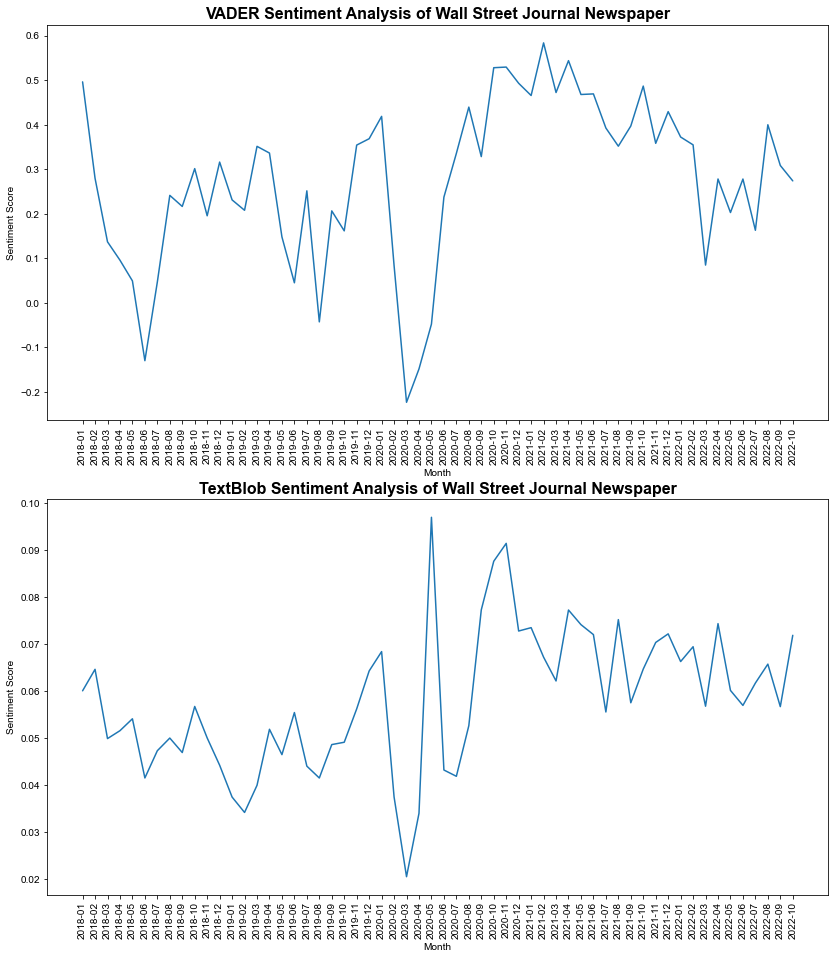

In [33]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(14, 16))

sns.set_style("white")
plt.sca(axes[0])
sns.lineplot(data=df1_3, x="Month", y="VADER_Newspaper_Compound")
plt.xlabel('Month')
plt.xticks(rotation = 90)
plt.ylabel('Sentiment Score')
plt.title('VADER Sentiment Analysis of Wall Street Journal Newspaper',  weight = 'bold', fontsize = 16)

plt.sca(axes[1])
sns.lineplot(data=df1_3, x="Month", y="TextBlob_Newspaper_Sentiment_Polarity")
plt.xlabel('Month')
plt.xticks(rotation = 90)
plt.ylabel('Sentiment Score')
plt.title('TextBlob Sentiment Analysis of Wall Street Journal Newspaper',  weight = 'bold', fontsize = 16)

plt.savefig('Figure1.png')
plt.show()

In [34]:
freq = df1['VADER_Newspaper_Positive_Sentiment'].value_counts()

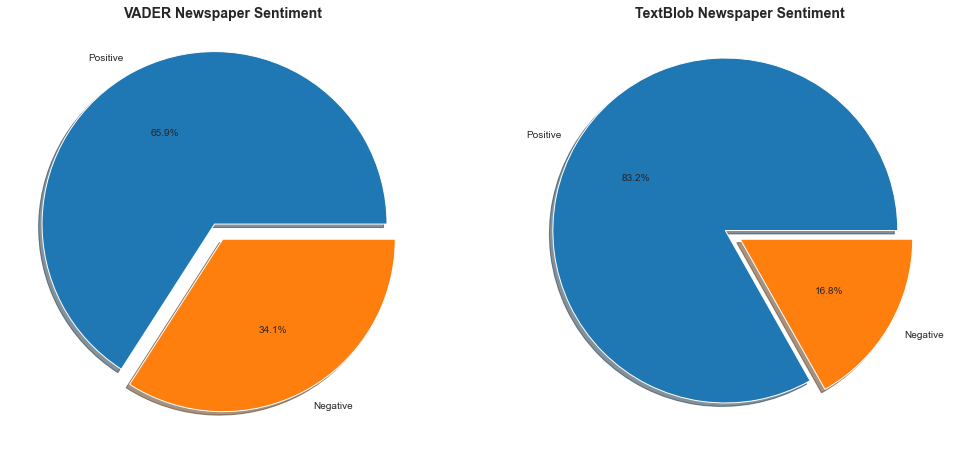

In [35]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(17, 10))

# VADER Newspaper Sentiment
freq = df1['VADER_Newspaper_Positive_Sentiment'].value_counts()
labels = ('Positive', 'Negative')
sizes = [freq[1], freq[0]]
explode = (0.1, 0)
plt.sca(axes[0])
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('VADER Newspaper Sentiment', weight='bold').set_fontsize('14')

# TextBlob Newspaper Sentiment
freq = df1['TextBlob_Newspaper_Positive_Sentiment'].value_counts()
labels = ('Positive', 'Negative')
sizes = [freq[1], freq[0]]
explode = (0.1, 0)
plt.sca(axes[1])
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('TextBlob Newspaper Sentiment', weight='bold').set_fontsize('14')

plt.savefig('Figure2.png')

plt.show()

**Based on the line plots and pie plots of the sentiments shown in Wall Street Journal news, we could detect the trends of sentiment score changes utilizing two types of lexicons -- VADER and TextBlob are consistent with each other. As for the proportion of negative words, the results are slightly different. Specifically, the proportion of negative text shown in Wall Street Journal news using VADER lexicon is 25.4% and 6.7% based on TextBlob lexicon.**

# Stock Data Analysis

In [36]:
df2 = pd.read_csv('SP500.csv')

In [37]:
df2_1 = df2.rename(columns = {'Index':'Date', 'GSPC.Adjusted': 'SP500_adj_price', 'GSPC.Volume': 'SP500_volume'})
df2_1['Date'] = df2_1['Date'].astype('datetime64')

In [38]:
df2_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1216 non-null   datetime64[ns]
 1   SP500_adj_price  1216 non-null   float64       
 2   SP500_volume     1216 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 28.6 KB


In [39]:
start = datetime.strptime('01-01-2018', '%m-%d-%Y')
date_generated = pd.date_range(start, periods = 1765)
date_generated

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-10-22', '2022-10-23', '2022-10-24', '2022-10-25',
               '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29',
               '2022-10-30', '2022-10-31'],
              dtype='datetime64[ns]', length=1765, freq='D')

In [40]:
df2_2 = pd.DataFrame(date_generated)
df2_2 = df2_2.rename(columns = {0:'Date'})
df2_2['Date'] = df2_2['Date'].astype('datetime64')
df2_2.head()

,Date
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05


In [41]:
df2_3 = pd.merge(df2_1,df2_2, how='right', left_on = 'Date', right_on = 'Date')

In [42]:
df2_3.set_index('Date', inplace = True)
df2_3.head()

,SP500_adj_price,SP500_volume
Date,,
2018-01-01,NaN,NaN
2018-01-02,2695.810059,3.397430e+09
2018-01-03,2713.060059,3.544030e+09
2018-01-04,2723.989990,3.697340e+09
2018-01-05,2743.149902,3.239280e+09


In [43]:
df2_3 = df2_3.fillna(method="ffill", axis = 0)
df2_3 = df2_3.iloc[1:, :]
df2_3

,SP500_adj_price,SP500_volume
Date,,
2018-01-02,2695.810059,3.397430e+09
2018-01-03,2713.060059,3.544030e+09
2018-01-04,2723.989990,3.697340e+09
2018-01-05,2743.149902,3.239280e+09
2018-01-06,2743.149902,3.239280e+09
...,...,...
2022-10-27,3807.300049,4.687320e+09
2022-10-28,3901.060059,4.459410e+09
2022-10-29,3901.060059,4.459410e+09


### Time Series Plot for Stock Price and Daily Changes of Stock Price

In [44]:
import sys

import pandas_datareader.data as web

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.tsa as smta

import matplotlib as mpl
%matplotlib inline
p = print

In [45]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        #qq_ax = plt.subplot2grid(layout, (2, 0))
        #pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        #sm.qqplot(y, line='s', ax=qq_ax)
        #qq_ax.set_title('QQ Plot')        
        #scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

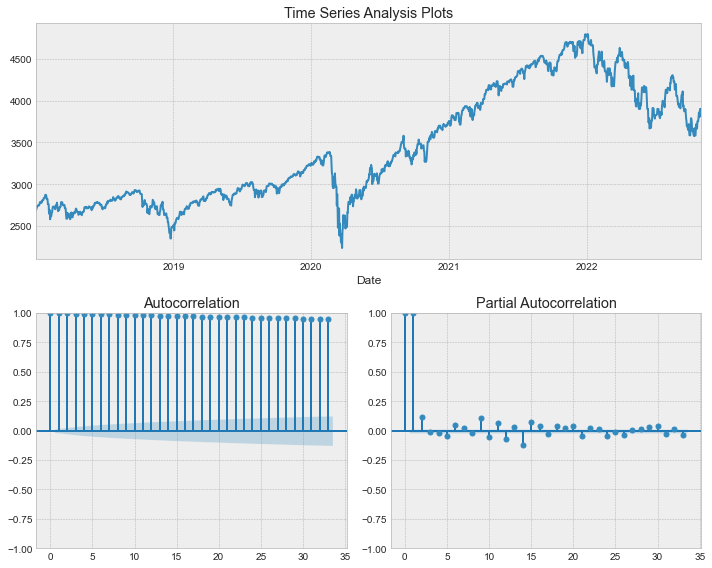

In [46]:
tsplot(df2_3['SP500_adj_price'])
plt.savefig('Figure3.png')

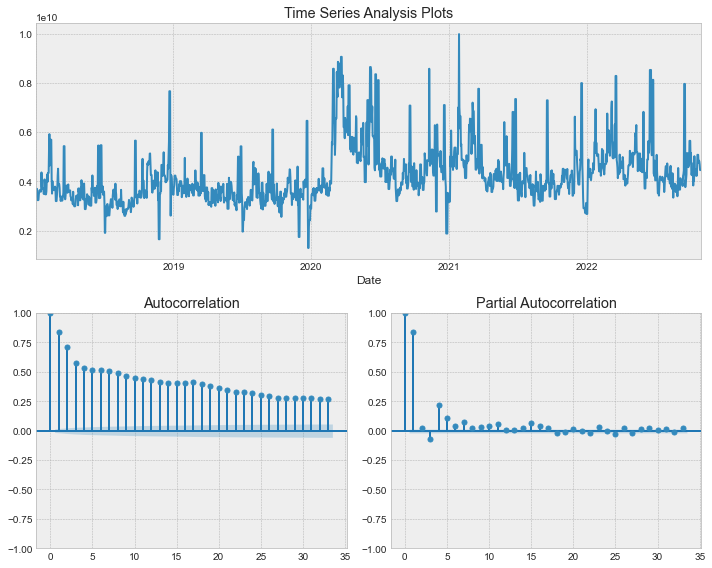

In [47]:
tsplot(df2_3['SP500_volume'])
plt.savefig('Figure4.png')

**In reality, time-series stock data is always non-stationary; for example, the plot for S&P500 stock price and total volume above are non-stationary. And the autocorrelation (ACF) and partial autocorrelation (PACF) plots testify to the autocorrelation.**

**Next, I will do AD Fuller tests for each stock series to detect the stationarity.** 

In [48]:
# Compute the ADF for the stock data to detect stationarity
# The null hypothesis for each test is that the stock data is non-stationarity
from statsmodels.tsa.stattools import adfuller
SP500 = adfuller(df2_3['SP500_adj_price'])
print('The p-value for the ADF test on S&P500 adjusted stock price is', SP500[1])
SP500_volume = adfuller(df2_3['SP500_volume'])
print('The p-value for the ADF test on S&P500 total volume is', SP500_volume[1])


The p-value for the ADF test on S&P500 adjusted stock price is 0.6988742967077024
The p-value for the ADF test on S&P500 total volume is 5.7408226686442366e-05


**From the results of ADF test, we could see the p-value for S\&P500 stock data is 0.70, much larger than 0.05, so we could not reject the null hypotheses, which leads to the conclusion that the S\&P 500 stock data is non-stationary. However, the p-value for the ADF test of S\&P500 total volume data is smaller than 0.05, thus we could reject the null and conclude that stock total volume data is stationary.**</font>

**Working with non-stationary data is difficult. To model, we need to convert a non-stationary process to stationary.** 

**First-difference is often used to convert a non-stationary process to stationary.** 

In [49]:
# S&P500 Stock Data
SP500_adj_price1d = np.diff(df2_3['SP500_adj_price'])

In [50]:
SP500_adj_price1d_ad = adfuller(SP500_adj_price1d)
print('The p-value for the ADF test on first-difference of S&P500 stock data is', SP500_adj_price1d_ad[1])

The p-value for the ADF test on first-difference of S&P500 stock data is 1.1453443296439017e-15


**After getting the first-difference of S&P500 stock data, through the Dickey-Fuller test, p-value for the ADF test on first difference of S&P500 stock data is 1.1453443296439017e-15, which is smaller than 0.05, thus we could conclude that the first difference gives us stationary white noise w(t).**

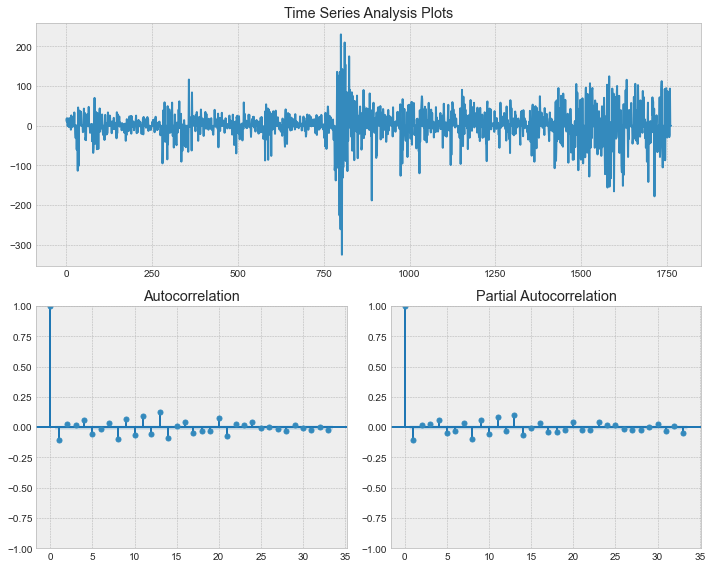

In [51]:
tsplot(SP500_adj_price1d)
plt.savefig('Figure5.png')

**Also, the first-difference stock data shows how the daily changes of S\&P 500 stock price change along the timeline, which would be useful for us to explore the relationship between sentiment score changes shown in the USTR tweets, press releases and WSJ newspapers and the first-difference stock price.**

In [52]:
df2_4 = df2_3.copy()
df2_4 = df2_4.iloc[1:,:]
df2_4['SP500_adj_price1d'] = SP500_adj_price1d

In [53]:
df2_4.head()

,SP500_adj_price,SP500_volume,SP500_adj_price1d
Date,,,
2018-01-03,2713.060059,3.544030e+09,17.250000
2018-01-04,2723.989990,3.697340e+09,10.929931
2018-01-05,2743.149902,3.239280e+09,19.159912
2018-01-06,2743.149902,3.239280e+09,0.000000
2018-01-07,2743.149902,3.239280e+09,0.000000


# Data Aggregation & Model Building

In [54]:
df1 = df1.set_index('Date')

In [55]:
df2_5 = pd.merge(df2_4,df1, how='left', left_index=True, right_index=True)
df2_5.head()

,SP500_adj_price,SP500_volume,SP500_adj_price1d,NewsTitle,NewsText,VADER_Newspaper_Negative,VADER_Newspaper_Positive,VADER_Newspaper_Neutral,VADER_Newspaper_Compound,TextBlob_Newspaper_Sentiment_Polarity,TextBlob_Newspaper_Sentiment_Subjectivity,VADER_Newspaper_Positive_Sentiment,TextBlob_Newspaper_Positive_Sentiment
Date,,,,,,,,,,,,,
2018-01-03,2713.060059,3.544030e+09,17.250000,The Hunt for Centuries-Old Books Reveals the P...,digit databas centuries-old book dawn print sh...,0.015,0.045,0.940,0.9042,0.058201,0.276989,1.0,1.0
2018-01-03,2713.060059,3.544030e+09,17.250000,"Foreign Firms Rush Washers, Solar Panels Into ...",foreign maker product includ wash machin solar...,0.069,0.107,0.824,0.9823,0.047174,0.388386,1.0,1.0
2018-01-03,2713.060059,3.544030e+09,17.250000,Readers Take Alan Blinder to Task on Taxes,"alan blinder' ""almost everyth wrong new tax la...",0.124,0.202,0.675,0.9515,0.133141,0.451253,1.0,1.0
2018-01-03,2713.060059,3.544030e+09,17.250000,China's Yuan Setting Is Highest Since May 2016...,china' central bank guid yuan highest level u....,0.037,0.124,0.838,0.9799,0.077356,0.342184,1.0,1.0
2018-01-04,2723.989990,3.697340e+09,10.929931,Finance &amp; Markets: Yuan Fix at Strongest S...,china' central bank guid yuan highest level u....,0.047,0.108,0.845,0.9493,0.070952,0.338164,1.0,1.0


In [56]:
df2_5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8111 entries, 2018-01-03 to 2022-10-31
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   SP500_adj_price                            8111 non-null   float64
 1   SP500_volume                               8111 non-null   float64
 2   SP500_adj_price1d                          8111 non-null   float64
 3   NewsTitle                                  5862 non-null   object 
 4   NewsText                                   7638 non-null   object 
 5   VADER_Newspaper_Negative                   7638 non-null   float64
 6   VADER_Newspaper_Positive                   7638 non-null   float64
 7   VADER_Newspaper_Neutral                    7638 non-null   float64
 8   VADER_Newspaper_Compound                   7638 non-null   float64
 9   TextBlob_Newspaper_Sentiment_Polarity      7638 non-null   float64
 10  TextBl

## Exploring Stock Price vs. Newspaper Sentiment

In [57]:
#creating OLS regression using statsmodels API
X1 = sm.add_constant(df2_5[['VADER_Newspaper_Negative', 'VADER_Newspaper_Positive', 'VADER_Newspaper_Neutral', 'VADER_Newspaper_Compound', 'TextBlob_Newspaper_Sentiment_Polarity']])
lr_model = sm.OLS(df2_5['SP500_adj_price'], X1, missing='drop').fit()
# summarize our model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        SP500_adj_price   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     52.40
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           1.24e-53
Time:                        23:04:46   Log-Likelihood:                -60543.
No. Observations:                7638   AIC:                         1.211e+05
Df Residuals:                    7632   BIC:                         1.211e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                 -2667.7727   1.52e+04     -0.176      0.861   -3.25e+04    2.71e+04
VADER_Newspaper_Negative               3847.2926   1.52e+04      0.253      0.800   -2.59e+04    3.36e+04
VADER_Newspaper_Positive               5502.1120   1.52e+04      0.362      0.717   -2.43e+04    3.53e+04
VADER_Newspaper_Neutral                6514.1618   1.52e+04      0.429      0.668   -2.33e+04    3.63e+04
VADER_Newspaper_Compound                 -8.7922     16.885     -0.521      0.603     -41.891      24.307
TextBlob_Newspaper_Sentiment_Polarity   764.2328    120.917      6.320      0.000     527.202    1001.263
==============================================================================
Omnibus:                    16088.751   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              524.716
Skew:                           0.077   Prob(JB):                    1.15e-114
Kurtosis:                       1.725   Cond. No.                     5.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Based on the summary of linear regression, the R squared value is nearly 0.03, leading to the conclusion that the linear regression model is not a good model representing the relationship between the stock price and the sentiment scores. Next, I will utilize NLP to explore the accuracy of using news articles content to predict the changes of stock data changes.**

## Exploring Stock Price vs Newspaper Text

In [58]:
df2_5['SP500_adj_price_increase'] = np.where(df2_5['SP500_adj_price1d'] > 0, 1, 0)

In [59]:
df2_6 = df2_5['SP500_adj_price_increase'].groupby(df2_5['SP500_adj_price_increase']).count()
df2_6

SP500_adj_price_increase
0    4977
1    3134
Name: SP500_adj_price_increase, dtype: int64

In [60]:
df2_7 = df2_5[['NewsText', 'SP500_adj_price_increase']]
df2_7 = df2_7.dropna()

In [61]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df2_7['NewsText'], 
                                                    df2_7['SP500_adj_price_increase'],
                                                    test_size = 0.25,
                                                    random_state=0)

## CountVectorizer
Bag of words

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)
vect

CountVectorizer()

In [63]:
vect.get_feature_names_out()[::2000]

array(['____________________________________________________________',
       'anatoliy', 'backdrop', 'blinking', 'calkins', 'civilisation',
       'cornromania', 'definitely', 'dotis', 'entrepreneurial', 'filmed',
       'gazzal', 'halle', 'huerta', 'intertwined', 'khawar', 'lifea',
       'marland', 'mitski', 'newmark', 'oti', 'photocopi', 'projectil',
       'refer', 'rounding', 'senzel', 'sofi', 'subsoil', 'therapy',
       'ulrich', 'versicherung', 'wolrath'], dtype=object)

In [64]:
len(vect.get_feature_names())

63286

In [65]:
# transform the documents in the training and testing data to a document-term matrix
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

In [66]:
# Train the linear regression model
model = LogisticRegression(max_iter = 1000)
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [67]:
# Predict the transformed test documents
predictions = model.predict(X_test_vectorized)
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.5551544622425629


In [68]:
model.coef_

array([[ 0.00083302,  0.01340121, -0.04756453, ..., -0.00642717,
        -0.00223206, -0.00023458]])

In [69]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names_out())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs:\n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['manufacturers' 'normal' 'smartphon' 'friday' 'collar' 'eventu' 'enorm'
 'off' 'common' 'kept']

Largest Coefs:
['recommend' 'figures' 'likely' 'blow' 'consumers' 'suffer' 'settl'
 'eager' 'sarah' 'depress']


In [70]:
# define models to train
names = ["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "SGD Classifier", "Naive Bayes", "SVM Classifier"]

classifiers = [
    LogisticRegression(max_iter = 10000),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel='linear')
]

models = zip(names, classifiers)

for name, model in models:
    model.fit(X_train_vectorized, y_train)
    roc_auc = roc_auc_score(y_test, model.predict(X_test_vectorized))
    score_train = model.score(X_train_vectorized, y_train)    
    score_test = model.score(X_test_vectorized, y_test)
    print("{} roc_auc : {}, score_train : {} and score_test : {}".format(name, roc_auc, score_train, score_test))

Logistic Regression roc_auc : 0.5551544622425629, score_train : 0.9998254189944135 and score_test : 0.5795811518324607
KNN roc_auc : 0.516687643020595, score_train : 0.7018156424581006 and score_test : 0.5633507853403141
Decision Tree roc_auc : 0.5440961098398169, score_train : 0.9998254189944135 and score_test : 0.5649214659685864
Random Forest roc_auc : 0.5307265446224256, score_train : 0.9998254189944135 and score_test : 0.6151832460732984
SGD Classifier roc_auc : 0.5503203661327231, score_train : 0.9928421787709497 and score_test : 0.5659685863874345
Naive Bayes roc_auc : 0.5750457665903891, score_train : 0.7758379888268156 and score_test : 0.5780104712041885
SVM Classifier roc_auc : 0.5502288329519451, score_train : 0.9996508379888268 and score_test : 0.5701570680628272


**Through ROC AUC value, the Naïve Bayes model performs best, with 0.5750 ROC AUC value. 
Based on testing accuracy, random forest performs best, with 0.6099 accuracy.**

## Tfidf
Vector instead of bag of words

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
tf_vect = TfidfVectorizer(min_df = 5).fit(X_train)
len(tf_vect.get_feature_names_out())

19836

In [72]:
X_train_vect_tf = tf_vect.transform(X_train)

X_test_vect_tf = tf_vect.transform(X_test)

tf_model = LogisticRegression()

tf_model.fit(X_train_vect_tf, y_train)

tf_predictions = tf_model.predict(X_test_vect_tf)

print('AUC: ', roc_auc_score(y_test, tf_predictions))

AUC:  0.5428775743707094


In [73]:
feature_names = np.array(tf_vect.get_feature_names_out())

sorted_tfidf_index = X_train_vect_tf.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['reprint' 'abt' 'spotti' 'shadowi' 'interlock' 'flexion' 'intolerable'
 'immort' 'trilogy' 'somervil']

Largest tfidf: 
['bitcoin' 'honda' 'porch' 'vw' 'guild' 'wine' 'canola' 'tomato' 'shultz'
 'vodka']


In [74]:
sorted_coef_index = tf_model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['friday' 'saturday' 'sunday' 'don' 'wsj' 'dr' 'eventu' 'war' 'normal'
 'economist']

Largest Coefs: 
['monday' 'tuesday' 'wednesday' 'financi' 'recommend' 'republican'
 'retail' 'educ' 'ethanol' 'energi']


In [75]:
# define models to train
names = ["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "SGD Classifier", "Naive Bayes", "SVM Classifier"]

classifiers = [
    LogisticRegression(max_iter = 10000),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel='linear')
]

models = zip(names, classifiers)

for name, model in models:
    model.fit(X_train_vect_tf, y_train)
    roc_auc = roc_auc_score(y_test, model.predict(X_test_vect_tf))
    score_train = model.score(X_train_vect_tf, y_train)    
    score_test = model.score(X_test_vect_tf, y_test)
    print("{} roc_auc : {}, score_train : {} and score_test : {}".format(name, roc_auc, score_train, score_test))

Logistic Regression roc_auc : 0.5428775743707094, score_train : 0.7702513966480447 and score_test : 0.6104712041884817
KNN roc_auc : 0.5540217391304348, score_train : 0.7280027932960894 and score_test : 0.5905759162303665
Decision Tree roc_auc : 0.5269508009153319, score_train : 0.9998254189944135 and score_test : 0.5429319371727749
Random Forest roc_auc : 0.5344450800915331, score_train : 0.9998254189944135 and score_test : 0.6083769633507854
SGD Classifier roc_auc : 0.5614759725400458, score_train : 0.8962988826815642 and score_test : 0.6068062827225131
Naive Bayes roc_auc : 0.5044164759725401, score_train : 0.6230796089385475 and score_test : 0.6041884816753926
SVM Classifier roc_auc : 0.55354118993135, score_train : 0.8355446927374302 and score_test : 0.612565445026178


**Through ROC AUC value, the Stochastic Gradient Descent (SGD) model performs best, with 0.5643 ROC AUC value. 
Based on testing accuracy, Support Vector Machine (SVM) performs best, with 0.6126 accuracy.**

## n-grams

In [76]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect_ngrams = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized_ngrams = vect_ngrams.transform(X_train)

len(vect_ngrams.get_feature_names())

92979

In [77]:
model = LogisticRegression()
model.fit(X_train_vectorized_ngrams, y_train)

X_test_vectorized_ngrams = vect_ngrams.transform(X_test)
predictions = model.predict(X_test_vectorized_ngrams)

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.569324942791762


In [78]:
feature_names = np.array(vect_ngrams.get_feature_names())

sorted_ngram_index = X_train_vectorized_ngrams.max(0).toarray()[0].argsort()

print('Smallest n_grams:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest n_grams: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest n_grams:
['cola' 'abil see' 'confrontations' 'compani requir' 'blizzard' 'ban ship'
 'bloomberg barclay' 'biggest issu' 'council group' 'concern suppli']

Largest n_grams: 
['aggress polici' 'biden choic' 'china retali' 'crisis accord'
 'beijing belt' 'current covid' 'allow fed' 'could end'
 'company headquart' 'crimean peninsula']
Smallest Coefs:
['friday' 'normal' 'eventu' 'kept' 'manufacturers' 'weekli' 'smartphon'
 'common' 'off' 'healthi']

Largest Coefs: 
['recommend' 'monday' 'educ' 'assist' 'emphas' 'urg' 'sarah' 'blow'
 'depress' 'monetari']


In [79]:
# define models to train
names = ["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "SGD Classifier", "Naive Bayes", "SVM Classifier"]

classifiers = [
    LogisticRegression(max_iter = 10000),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel='linear')
]

models = zip(names, classifiers)

for name, model in models:
    model.fit(X_train_vectorized_ngrams, y_train)
    roc_auc = roc_auc_score(y_test, model.predict(X_test_vectorized_ngrams))
    score_train = model.score(X_train_vectorized_ngrams, y_train)    
    score_test = model.score(X_test_vectorized_ngrams, y_test)
    print("{} roc_auc : {}, score_train : {} and score_test : {}".format(name, roc_auc, score_train, score_test))

Logistic Regression roc_auc : 0.5632036613272311, score_train : 0.9998254189944135 and score_test : 0.5890052356020943
KNN roc_auc : 0.5077860411899313, score_train : 0.6984986033519553 and score_test : 0.562303664921466
Decision Tree roc_auc : 0.5468821510297482, score_train : 0.9998254189944135 and score_test : 0.5701570680628272
Random Forest roc_auc : 0.5233009153318078, score_train : 0.9998254189944135 and score_test : 0.6078534031413613
SGD Classifier roc_auc : 0.5597139588100686, score_train : 0.9956354748603352 and score_test : 0.5853403141361256
Naive Bayes roc_auc : 0.5821567505720824, score_train : 0.7987081005586593 and score_test : 0.5895287958115183
SVM Classifier roc_auc : 0.5619565217391305, score_train : 0.9996508379888268 and score_test : 0.5848167539267015


**Through ROC AUC value, the Naive Bayes model performs best, with 0.5822 ROC AUC value. 
Based on testing accuracy, Random Forest performs best, with 0.6079 accuracy.**

**In conclusion, Naïve Bayes model is the best model according to ROC AUC value and Random Forest model has the best performance according to testing score. Besides, there is no big difference on the model accuracy utilizing different vectorizers to generate the matrix of token counts.**

**We could try to use NLP analysis of WSJ newspaper articles related to U.S. trade to predict the changes of stock price.**